In [88]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [89]:
import re
import csv
from datetime import datetime
from collections import namedtuple

%matplotlib inline
import matplotlib.pyplot as plt


# pip install workalendar
# https://github.com/novafloss/workalendar
from workalendar.europe import Italy

In [90]:
cal = Italy()

def def_is_holiday(dt_obj):
    if(cal.is_working_day(dt_obj)):
        return 0
    else:
        return 1

In [91]:
row = namedtuple("sample", ['sottoarea', 'area', 'zona', 'prodotto', 'data', 'timestamp', 'giorno_della_settimana',
                              'giorno_del_mese', 'giorno_dell_anno', 'settimana_dell_anno', 'mese', 'anno',
                              'festivo','vendite'])

In [92]:
def do_parse(x):
    # Oggetto Datetime
    dt_obj = datetime.strptime(str(x[4]), '"%Y-%m-%d"')
    
    return row(
        sottoarea = int(re.sub("[^0-9]", "", x[2])),
        area = int(re.sub("[^0-9]", "", x[1])),
        zona = int(re.sub("[^0-9]", "", str(x[0]))),  
        prodotto = int(re.sub("[^0-9]", "", x[3])),
        data = x[4],
        timestamp = int(dt_obj.strftime("%s")),
        giorno_della_settimana = int(dt_obj.weekday()) + 1,
        giorno_del_mese = int(dt_obj.strftime("%d")),
        giorno_dell_anno = int(dt_obj.timetuple().tm_yday),
        settimana_dell_anno = int(dt_obj.strftime("%U")) + 1,
        mese = int(dt_obj.strftime("%m")),
        anno = int(dt_obj.strftime("%Y")),
        festivo = def_is_holiday(dt_obj),
        vendite = int(x[5])
        )

def parse(sc,filepath):
    rawRdd = sc.textFile(filepath)
    
    header = rawRdd.first()

    # Togliamo l'header
    rawRdd = rawRdd.filter(lambda x: x != header)

    # Togliamo le righe vuote
    rawRdd = rawRdd.filter(lambda x: x != "")
    
    return rawRdd.map(lambda x: x.split(",")).map(lambda x: do_parse(x))

In [93]:
rdd = parse(sc,"dataset/dataset_polimi.csv")
rdd.take(10)

[sample(sottoarea=5, area=1, zona=1, prodotto=1, data='"2014-01-01"', timestamp=1388530800, giorno_della_settimana=3, giorno_del_mese=1, giorno_dell_anno=1, settimana_dell_anno=1, mese=1, anno=2014, festivo=1, vendite=0),
 sample(sottoarea=5, area=1, zona=1, prodotto=1, data='"2014-01-02"', timestamp=1388617200, giorno_della_settimana=4, giorno_del_mese=2, giorno_dell_anno=2, settimana_dell_anno=1, mese=1, anno=2014, festivo=0, vendite=5),
 sample(sottoarea=5, area=1, zona=1, prodotto=1, data='"2014-01-03"', timestamp=1388703600, giorno_della_settimana=5, giorno_del_mese=3, giorno_dell_anno=3, settimana_dell_anno=1, mese=1, anno=2014, festivo=0, vendite=3),
 sample(sottoarea=5, area=1, zona=1, prodotto=1, data='"2014-01-04"', timestamp=1388790000, giorno_della_settimana=6, giorno_del_mese=4, giorno_dell_anno=4, settimana_dell_anno=1, mese=1, anno=2014, festivo=1, vendite=0),
 sample(sottoarea=5, area=1, zona=1, prodotto=1, data='"2014-01-05"', timestamp=1388876400, giorno_della_settima

# Pandas
if you cannot stay without it

In [94]:
import pandas as pd

In [95]:
#porto sottoarea come prima colonna per poi fare il join
#rdd = rdd.map(lambda x: (x[2], x[1], x[0], x[3], x[4], x[5], x[6], x[7], x[8], x[9], x[10], x[11]))

In [96]:
row1 = namedtuple("gps", ['sottoarea', 'lat', 'lon', 'citta', 'provincia', 'regione', 'zona_italia',
                              'isola', 'abitanti', 'min_distanza', 'densita'])

In [97]:
def do_parse_locations(x):
    return row1(
        sottoarea = int(x[0]),
        lat = float(x[1]),
        lon = float(x[2]),  
        citta = x[3],
        provincia = x[4],
        regione = x[5],
        zona_italia = x[6],
        isola = int(x[7]),
        abitanti = int(x[8]),
        min_distanza = int(x[9]),
        densita = int(x[10])
        )

def parse_locations(sc,filepath):
    rawRdd = sc.textFile(filepath)
    
    header = rawRdd.first()

    # Togliamo l'header
    rawRdd = rawRdd.filter(lambda x: x != header)
    
    return rawRdd.map(lambda x: x.split(",")).map(lambda x: do_parse_locations(x))

In [98]:
rdd.first()

sample(sottoarea=5, area=1, zona=1, prodotto=1, data='"2014-01-01"', timestamp=1388530800, giorno_della_settimana=3, giorno_del_mese=1, giorno_dell_anno=1, settimana_dell_anno=1, mese=1, anno=2014, festivo=1, vendite=0)

In [99]:
rdd1 = rdd.map(lambda x: (x[0], list(x[1:])))
rdd1.first()

(5, [1, 1, 1, '"2014-01-01"', 1388530800, 3, 1, 1, 1, 1, 2014, 1, 0])

In [100]:
rdd_gps = parse_locations(sc,"dataset/gps_processed_andrea.csv")
rdd_gps.first()

gps(sottoarea=1, lat=37.57251433333334, lon=14.20335411764705, citta='Villarosa', provincia='EN', regione='SIC', zona_italia='Sud', isola=1, abitanti=4937, min_distanza=50450, densita=0)

In [101]:
rdd_gps1 = rdd_gps.map(lambda x: (x[0], list(x[1:])))
rdd_gps1.first()

(1,
 [37.57251433333334,
  14.20335411764705,
  'Villarosa',
  'EN',
  'SIC',
  'Sud',
  1,
  4937,
  50450,
  0])

In [102]:
rdd.filter(lambda x: x.sottoarea == 68).take(10)

[sample(sottoarea=68, area=55, zona=20, prodotto=1, data='"2014-01-01"', timestamp=1388530800, giorno_della_settimana=3, giorno_del_mese=1, giorno_dell_anno=1, settimana_dell_anno=1, mese=1, anno=2014, festivo=1, vendite=0),
 sample(sottoarea=68, area=55, zona=20, prodotto=1, data='"2014-01-02"', timestamp=1388617200, giorno_della_settimana=4, giorno_del_mese=2, giorno_dell_anno=2, settimana_dell_anno=1, mese=1, anno=2014, festivo=0, vendite=1),
 sample(sottoarea=68, area=55, zona=20, prodotto=1, data='"2014-01-03"', timestamp=1388703600, giorno_della_settimana=5, giorno_del_mese=3, giorno_dell_anno=3, settimana_dell_anno=1, mese=1, anno=2014, festivo=0, vendite=1),
 sample(sottoarea=68, area=55, zona=20, prodotto=1, data='"2014-01-04"', timestamp=1388790000, giorno_della_settimana=6, giorno_del_mese=4, giorno_dell_anno=4, settimana_dell_anno=1, mese=1, anno=2014, festivo=1, vendite=1),
 sample(sottoarea=68, area=55, zona=20, prodotto=1, data='"2014-01-05"', timestamp=1388876400, giorn

In [103]:
result = namedtuple("sample", ['sottoarea', 'abitanti', 'min_distanza', 'densita', 
                                'prodotto', 'data', 'giorno_della_settimana', 'giorno_del_mese',
                                'giorno_dell_anno', 'settimana_dell_anno', 'mese', 'anno', 'festivo', 'vendite'])

In [104]:
def do_parse_join(x):
    return result(
        sottoarea = x[0],
        abitanti = x[1][0][7],
        min_distanza = x[1][0][8],
        densita = x[1][0][9] + 1, #facendo così considero anche se stesso nel raggio, evitando di avere densita 0 che con certi algoritmi potrebbe dare problemi
        prodotto = x[1][1][2],
        data = x[1][1][3].replace('"', ''),
        giorno_della_settimana = x[1][1][5],
        giorno_del_mese = x[1][1][6],
        giorno_dell_anno = x[1][1][7],
        settimana_dell_anno = x[1][1][8],
        mese = x[1][1][9],
        anno = x[1][1][10],
        festivo = x[1][1][11],
        vendite = x[1][1][12],
    )

In [105]:
rdd_gps1.join(rdd1).take(10)

[(68,
  ([38.16890584269665,
    15.005016404494388,
    'Patti',
    'ME',
    'SIC',
    'Sud',
    1,
    13431,
    33235,
    0],
   [55, 20, 1, '"2014-01-01"', 1388530800, 3, 1, 1, 1, 1, 2014, 1, 0])),
 (68,
  ([38.16890584269665,
    15.005016404494388,
    'Patti',
    'ME',
    'SIC',
    'Sud',
    1,
    13431,
    33235,
    0],
   [55, 20, 1, '"2014-01-02"', 1388617200, 4, 2, 2, 1, 1, 2014, 0, 1])),
 (68,
  ([38.16890584269665,
    15.005016404494388,
    'Patti',
    'ME',
    'SIC',
    'Sud',
    1,
    13431,
    33235,
    0],
   [55, 20, 1, '"2014-01-03"', 1388703600, 5, 3, 3, 1, 1, 2014, 0, 1])),
 (68,
  ([38.16890584269665,
    15.005016404494388,
    'Patti',
    'ME',
    'SIC',
    'Sud',
    1,
    13431,
    33235,
    0],
   [55, 20, 1, '"2014-01-04"', 1388790000, 6, 4, 4, 1, 1, 2014, 1, 1])),
 (68,
  ([38.16890584269665,
    15.005016404494388,
    'Patti',
    'ME',
    'SIC',
    'Sud',
    1,
    13431,
    33235,
    0],
   [55, 20, 1, '"2014-01-05"', 13

In [106]:
res = rdd_gps1.join(rdd1).map(lambda x: do_parse_join(x))
res.take(5)

[sample(sottoarea=68, abitanti=13431, min_distanza=33235, densita=1, prodotto=1, data='2014-01-01', giorno_della_settimana=3, giorno_del_mese=1, giorno_dell_anno=1, settimana_dell_anno=1, mese=1, anno=2014, festivo=1, vendite=0),
 sample(sottoarea=68, abitanti=13431, min_distanza=33235, densita=1, prodotto=1, data='2014-01-02', giorno_della_settimana=4, giorno_del_mese=2, giorno_dell_anno=2, settimana_dell_anno=1, mese=1, anno=2014, festivo=0, vendite=1),
 sample(sottoarea=68, abitanti=13431, min_distanza=33235, densita=1, prodotto=1, data='2014-01-03', giorno_della_settimana=5, giorno_del_mese=3, giorno_dell_anno=3, settimana_dell_anno=1, mese=1, anno=2014, festivo=0, vendite=1),
 sample(sottoarea=68, abitanti=13431, min_distanza=33235, densita=1, prodotto=1, data='2014-01-04', giorno_della_settimana=6, giorno_del_mese=4, giorno_dell_anno=4, settimana_dell_anno=1, mese=1, anno=2014, festivo=1, vendite=1),
 sample(sottoarea=68, abitanti=13431, min_distanza=33235, densita=1, prodotto=1,

In [107]:
res.map(lambda x: x.densita).filter(lambda x: x > 0).max()

7

In [108]:
sottoaree = set(rdd.map(lambda x: x.sottoarea).collect())
sottoaree

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145}

In [109]:
collected_rdd = res.collect()

In [110]:
df = pd.DataFrame.from_records(collected_rdd, columns = ['sottoarea', 'abitanti', 'min_distanza', 'densita', 'prodotto', 'data',
                                                         'giorno_della_settimana', 'giorno_del_mese', 
                                                         'giorno_dell_anno', 'settimana_dell_anno', 'mese', 'anno', 'festivo', 'vendite'])

In [111]:
df[0:10]

,sottoarea,abitanti,min_distanza,densita,prodotto,data,giorno_della_settimana,giorno_del_mese,giorno_dell_anno,settimana_dell_anno,mese,anno,festivo,vendite
0,68,13431,33235,1,1,2014-01-01,3,1,1,1,1,2014,1,0
1,68,13431,33235,1,1,2014-01-02,4,2,2,1,1,2014,0,1
2,68,13431,33235,1,1,2014-01-03,5,3,3,1,1,2014,0,1
3,68,13431,33235,1,1,2014-01-04,6,4,4,1,1,2014,1,1
4,68,13431,33235,1,1,2014-01-05,7,5,5,2,1,2014,1,2
5,68,13431,33235,1,1,2014-01-06,1,6,6,2,1,2014,1,0
6,68,13431,33235,1,1,2014-01-07,2,7,7,2,1,2014,0,2
7,68,13431,33235,1,1,2014-01-08,3,8,8,2,1,2014,0,3
8,68,13431,33235,1,1,2014-01-09,4,9,9,2,1,2014,0,3
9,68,13431,33235,1,1,2014-01-10,5,10,10,2,1,2014,0,3


In [112]:
#df[1:10].values

In [113]:
#df.to_csv('dataset_polimi_andrea3.csv', sep=',', index=False)

In [114]:
#df[1:10].sottoarea

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145


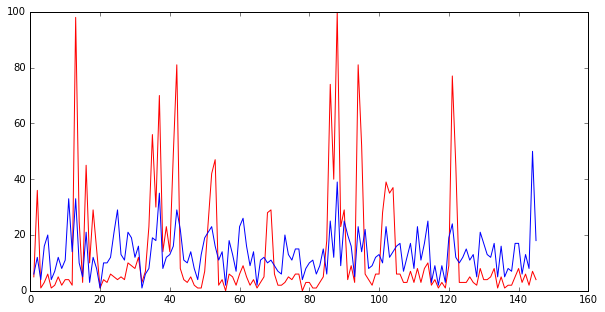

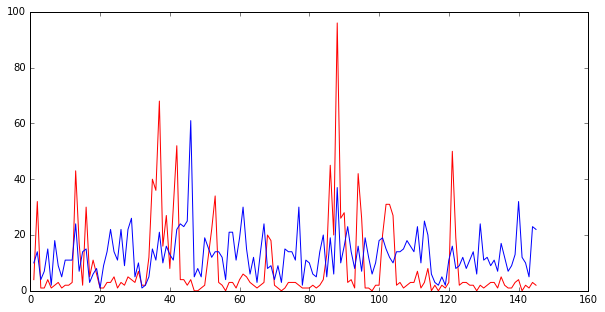

In [115]:
def do_parse_sub(x, max2):
    return result(
        sottoarea = x[0],
        abitanti = x[1],
        min_distanza = x[2],
        densita = x[3],
        prodotto = x[4],
        data = x[5],
        giorno_della_settimana = x[6],
        giorno_del_mese = x[7],
        giorno_dell_anno = x[8],
        settimana_dell_anno = x[9],
        mese = x[10],
        anno = x[11],
        festivo = x[12],
        vendite = max2,
    )

m_outlier_1 = []
m2_1 = []

m_outlier_2 = []
m2_2 = []

for s in sottoaree:
    prod1 = res.filter(lambda x: x.prodotto == 1 and x.sottoarea == s)
    m_out = prod1.filter(lambda x: x.data == '2014-06-30').map(lambda x: x.vendite).max()
    m_outlier_1.append(m_out)
    max2 = prod1.map(lambda x: x.vendite if x.data != '2014-06-30' else 0).max()
    m2_1.append(max2)
    prod1 = prod1.map(lambda x: x if x.data != '2014-06-30' or (x.data == '2014-06-30' and x.vendite <= max2) else do_parse_sub(x, max2))
    collected_rdd1 = prod1.collect()
    df1 = pd.DataFrame.from_records(collected_rdd1, columns = ['sottoarea', 'abitanti', 'min_distanza', 'densita', 'prodotto', 'data',
                                                         'giorno_della_settimana', 'giorno_del_mese', 
                                                         'giorno_dell_anno', 'settimana_dell_anno', 'mese', 'anno', 'festivo', 'vendite'])
    #df1.to_csv('dataset/prodotto_sottoarea/prodotto1_sottoarea' + str(s) +'.csv', sep=',', index=False)
    
    prod2 = res.filter(lambda x: x.prodotto == 2 and x.sottoarea == s)
    m_out = prod2.filter(lambda x: x.data == '2014-06-30').map(lambda x: x.vendite).max()
    m_outlier_2.append(m_out)
    max2 = prod2.map(lambda x: x.vendite if x.data != '2014-06-30' else 0).max()
    m2_2.append(max2)
    prod2 = prod2.map(lambda x: x if x.data != '2014-06-30' or (x.data == '2014-06-30' and x.vendite <= max2) else do_parse_sub(x, max2))
    collected_rdd2 = prod2.collect()
    df2 = pd.DataFrame.from_records(collected_rdd2, columns = ['sottoarea', 'abitanti', 'min_distanza', 'densita', 'prodotto', 'data',
                                                        'giorno_della_settimana', 'giorno_del_mese', 
                                                         'giorno_dell_anno', 'settimana_dell_anno', 'mese', 'anno', 'festivo', 'vendite'])
    #df2.to_csv('dataset/prodotto_sottoarea/prodotto2_sottoarea' + str(s) +'.csv', sep=',', index=False)
    print(s)
    
fig = plt.figure(figsize=(10,5))
plot1 = plt.plot(list(sottoaree), m_outlier_1, 'r', list(sottoaree), m2_1, 'b')

fig = plt.figure(figsize=(10,5))
plot2 = plt.plot(list(sottoaree), m_outlier_2, 'r', list(sottoaree), m2_2, 'b')

In [116]:
def do_parse_sub(x, max2):
    return result(
        sottoarea = x[0],
        abitanti = x[1],
        min_distanza = x[2],
        densita = x[3],
        prodotto = x[4],
        data = x[5],
        giorno_della_settimana = x[6],
        giorno_del_mese = x[7],
        giorno_dell_anno = x[8],
        settimana_dell_anno = x[9],
        mese = x[10],
        anno = x[11],
        festivo = x[12],
        vendite = max2,
    )

m_outlier_1 = []
m2_1 = []

m_outlier_2 = []
m2_2 = []

for s in sottoaree:
    prod1 = res.filter(lambda x: x.prodotto == 1 and x.sottoarea == s)
    #m_out = prod1.filter(lambda x: x.data == '2014-06-30').map(lambda x: x.vendite).max()
    #m_outlier_1.append(m_out)
    max2 = prod1.map(lambda x: x.vendite if x.data != '2014-06-30' else 0).max()
    #m2_1.append(max2)
    prod1 = prod1.map(lambda x: x if x.data != '2014-06-30' or (x.data == '2014-06-30' and x.vendite <= max2) else do_parse_sub(x, max2))
    collected_rdd1 = prod1.collect()
    df1 = pd.DataFrame.from_records(collected_rdd1, columns = ['sottoarea', 'abitanti', 'min_distanza', 'densita', 'prodotto', 'data',
                                                         'giorno_della_settimana', 'giorno_del_mese', 
                                                         'giorno_dell_anno', 'settimana_dell_anno', 'mese', 'anno', 'festivo', 'vendite'])
    df1.to_csv('dataset/prodotto_sottoarea/prodotto1_sottoarea' + str(s) +'.csv', sep=',', index=False)
    
    prod2 = res.filter(lambda x: x.prodotto == 2 and x.sottoarea == s)
    #m_out = prod2.filter(lambda x: x.data == '2014-06-30').map(lambda x: x.vendite).max()
    #m_outlier_2.append(m_out)
    max2 = prod2.map(lambda x: x.vendite if x.data != '2014-06-30' else 0).max()
    #m2_2.append(max2)
    prod2 = prod2.map(lambda x: x if x.data != '2014-06-30' or (x.data == '2014-06-30' and x.vendite <= max2) else do_parse_sub(x, max2))
    collected_rdd2 = prod2.collect()
    df2 = pd.DataFrame.from_records(collected_rdd2, columns = ['sottoarea', 'abitanti', 'min_distanza', 'densita', 'prodotto', 'data',
                                                        'giorno_della_settimana', 'giorno_del_mese', 
                                                         'giorno_dell_anno', 'settimana_dell_anno', 'mese', 'anno', 'festivo', 'vendite'])
    df2.to_csv('dataset/prodotto_sottoarea/prodotto2_sottoarea' + str(s) +'.csv', sep=',', index=False)
    print(s)
    
#fig = plt.figure(figsize=(10,5))
#plot1 = plt.plot(list(sottoaree), m_outlier_1, 'r', list(sottoaree), m2_1, 'b')

#fig = plt.figure(figsize=(10,5))
#plot2 = plt.plot(list(sottoaree), m_outlier_2, 'r', list(sottoaree), m2_2, 'b')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
